In [1]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True) 
df = titanic.frame 

1.Data processing and visualization

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [40]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_num
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",NaN
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",NaN
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN


In [41]:
#Thống kê cơ bản
df.describe()

,pclass,age,sibsp,parch,fare,body,survived_num
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,0.0
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917,NaN
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922,NaN
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000,NaN
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000,NaN
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000,NaN
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000,NaN
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000,NaN


In [42]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived_num'],
      dtype='object')

In [43]:
df.dtypes

pclass             int64
survived        category
name              object
sex             category
age              float64
sibsp              int64
parch              int64
ticket            object
fare             float64
cabin             object
embarked        category
boat              object
body             float64
home.dest         object
survived_num     float64
dtype: object

In [44]:
#Hiển thị số lượng giá trị bị thiếu
column_names = df.columns
for column in column_names:
    print(column + '-' + str(df[column].isnull().sum()))

pclass-0
survived-0
name-0
sex-0
age-263
sibsp-0
parch-0
ticket-0
fare-1
cabin-1014
embarked-2
boat-823
body-1188
home.dest-564
survived_num-1309


'survived' là biến mục tiêu (target column)

'age' and 'embarked' tính giá trị thay thế

'cabin' remove missing data

In [45]:
df.survived.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

Text(0, 0.5, 'Passenger Count')

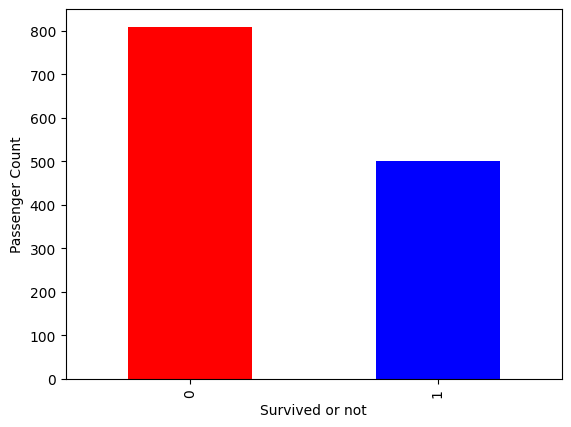

In [46]:
colors_list = ['red', 'blue']

plt = df.survived.value_counts().plot(kind = 'bar', color = colors_list)
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

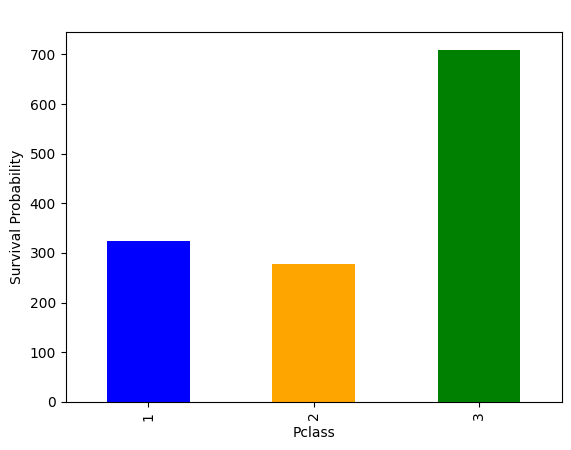

In [47]:
colors_list = ['blue','orange', 'green']
plt = df['pclass'].value_counts().sort_index().plot(kind = 'bar', color=colors_list, title = ' ' )
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [48]:
df[['pclass','survived']].groupby('pclass').count()

,survived
pclass,
1,323
2,277
3,709


Pclass - Survival probability

Preprocess test data

In [49]:
test_data = df.drop(columns=['ticket', 'cabin'])
test_data.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,survived_num
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO",NaN
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",NaN
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN


In [50]:
test_data['sex'] = test_data['sex'].map({'male':0,'female':1})
test_data['embarked'] = test_data['embarked'].map({'C':0, 'Q':1, 'S':2})

In [51]:
test_data.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,survived_num
0,1,1,"Allen, Miss. Elisabeth Walton",NaN,29.0000,0,0,211.3375,2,2,NaN,"St Louis, MO",NaN
1,1,1,"Allison, Master. Hudson Trevor",NaN,0.9167,1,2,151.5500,2,11,NaN,"Montreal, PQ / Chesterville, ON",NaN
2,1,0,"Allison, Miss. Helen Loraine",NaN,2.0000,1,2,151.5500,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",NaN,30.0000,1,2,151.5500,2,NaN,135.0,"Montreal, PQ / Chesterville, ON",NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",NaN,25.0000,1,2,151.5500,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN


Sử dụng LightAutoML giải quyết bài toán binary classification của Titanic.